In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.metrics as sm
import sklearn.datasets as sd
import sklearn.utils as su
from sklearn.model_selection import train_test_split

In [3]:
boston = sd.load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
x = boston.data
y = boston.target

In [5]:
data = pd.DataFrame(x, columns=boston.feature_names)
data['target'] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


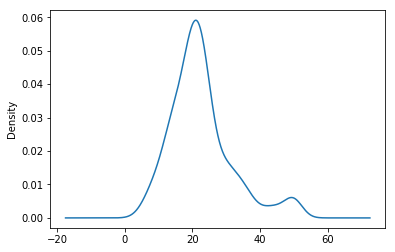

In [7]:
data.target.plot(kind='kde')

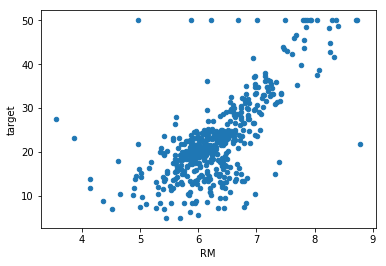

In [8]:
data.plot(kind='scatter', x='RM', y='target')

0.7433142710367526
0.756365358894937
0.7546604886313042
0.7519746526806411
0.749006118678788
0.7460208683956402
0.7431265904184965
0.7403659749366766
0.7377526965638121
0.7352869074109347
0.7329624625493494
0.7307704737031682
0.7287011099346609
0.7267445157968535
0.7248912683744126
0.7231325877746206
0.7214604145899668
0.7198674161196772
0.7183469556309474
0.716893043873241


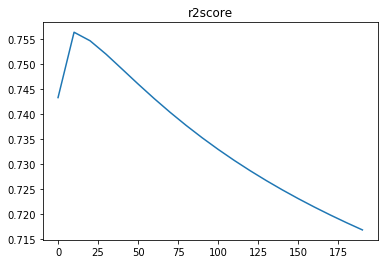

In [9]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
)
C = np.arange(0, 200, 10)
score = []
for c in C:
    model = lm.Ridge(c)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2score = sm.r2_score(y_test, predictions)
    score.append(r2score)
    print(r2score)
#     print(sm.mean_absolute_error(y_test, predictions))
#     plt.scatter(y_test, predictions, color='green')
plt.title('r2score')
plt.plot(C, score)

## 多项式

In [14]:
# model = pl.make_pipeline(sp.PolynomialFeatures(2), lm.LinearRegression())
model = pl.make_pipeline(sp.PolynomialFeatures(2), lm.Ridge(100))
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(sm.r2_score(y_test, predictions))

0.8836904110760394
